In [7]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import umap
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [10]:
reducer = umap.UMAP()
iris = load_iris()

In [12]:
embedding = reducer.fit_transform(iris.data);

/home/jgs/softerwares/anaconda3/lib/python3.5/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/home/jgs/softerwares/anaconda3/lib/python3.5/site-packages/umap/spectral.py:229: UserWarning: Embedding 2 connected components using meta-embedding (experimental)
  n_components


/home/jgs/softerwares/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


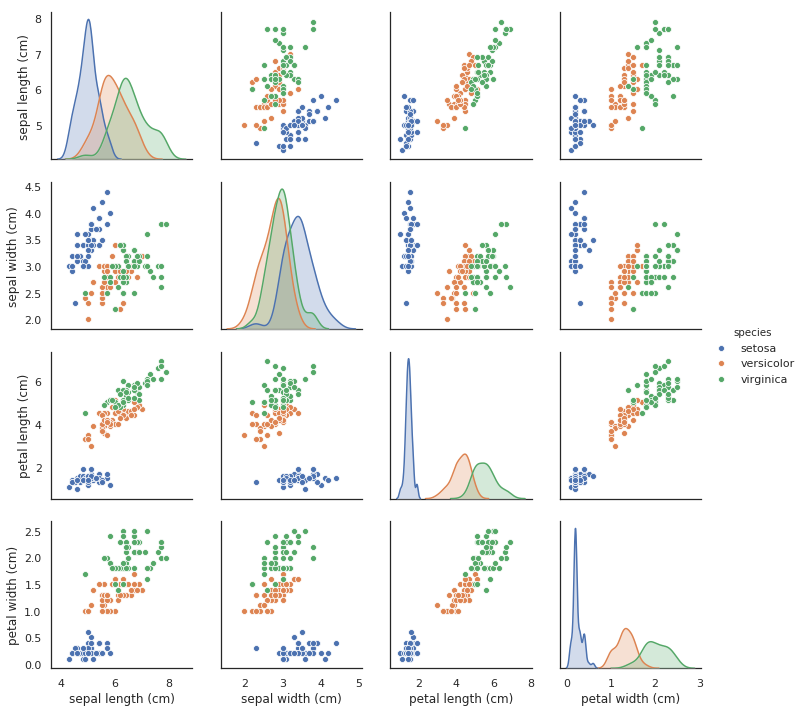

In [13]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
sns.pairplot(iris_df, hue='species');

In [14]:
embedding = reducer.fit_transform(iris.data)

/home/jgs/softerwares/anaconda3/lib/python3.5/site-packages/sklearn/metrics/pairwise.py:258: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/home/jgs/softerwares/anaconda3/lib/python3.5/site-packages/umap/spectral.py:229: UserWarning: Embedding 2 connected components using meta-embedding (experimental)
  n_components


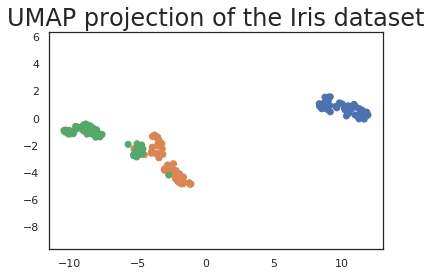

In [15]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in iris.target])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);

In [17]:
df = pd.read_table('~/database/anno_miscellules/score_all_final_03.04.17.txt')

In [21]:
df.head()

,Score,STRING-combinedscore,ExAC-pRec,STRING-experimentalscore,ExAC-missensez-score,PhyloPat5'-UTR,STRING-textminingscore,Numberdonor/numbersynonymous,mRNAhalf-life->10h
0,0.232925,0,0.644086,0,3.602089,0.270124,0,0.000000,0
1,0.061166,0,0.500000,0,0.000000,-1.000000,0,0.000000,0
2,0.061166,0,0.500000,0,0.000000,-1.000000,0,0.000000,0
3,0.052715,0,0.183700,0,-3.786196,-0.218453,0,0.024631,1
4,0.621131,5,0.002563,1,-2.275892,-0.072542,3,0.017021,0


In [20]:
df = df.drop(['Gene', 'lda_score'], axis=1)

In [32]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(df.values)

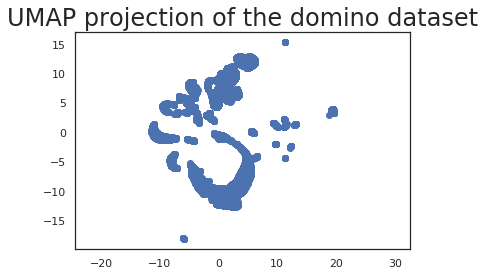

In [33]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the domino dataset', fontsize=24);